
 # Steady-state distributions of the Fockker Planck equation on the circle

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
eps = 1/100
beta = 5.0

## The modified heat equation
$$
\frac{\partial \rho}{\partial t} = \frac{1}{\beta}\,
\frac{\partial^2  }{\partial x^2}
\left( \left(\epsilon^2 + \phi^{2}(x)\right)\rho \right)
$$
The steady-state disribution is given by
$$
\rho^{ss}(x) = \frac{c}{\epsilon^2 + \phi^{2}(x)}
$$
where 
$$
\frac{1}{c} = \int_{0}^{2\pi}\frac{1}{\left(\epsilon^2 + \phi^{2}(x)\right)}\,dx 
$$

## SDE with null drifft
$$
dX = \sqrt{   \frac{2\left(\epsilon^2 + \phi^{2}(x)\right)}{\beta} }\, dW
$$

In [6]:
nsteps = 3000
dt = 1/10000

In [7]:
def phi_walk(x):
    for i in  range(nsteps):
        eigmd = np.sin(x)
        dw = np.sqrt(dt)*np.random.normal(0, 1) 
        x = x + np.sqrt(2/beta)*np.sqrt((eigmd)**2+ eps**2)*dw
    return np.abs(x-int(x/(2*np.pi))*2*np.pi) 

In [8]:
init=np.random.uniform(low=0.0, high=2*np.pi, size=200)

In [9]:
dta = list(map(phi_walk, init))

In [10]:
def helpf(x): return 1/( eps**2 + np.sin(x)**2)
from scipy.integrate import quad
c, err = quad(helpf, 0, 2*np.pi) 

In [11]:
ejex1 = np.linspace(0,   np.pi, 1000)
ejey1 = helpf(ejex1)/c
ejex2 = np.linspace(np.pi, 2*np.pi, 1000)
ejey2 = helpf(ejex2)/c

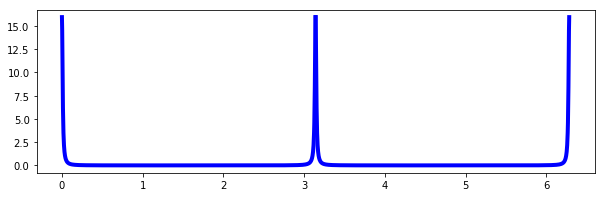

In [18]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.plot(ejex1,ejey1, linewidth=4,   color = 'blue')
ax.plot(ejex2,ejey2, linewidth=4,  color = 'blue')
plt.show()

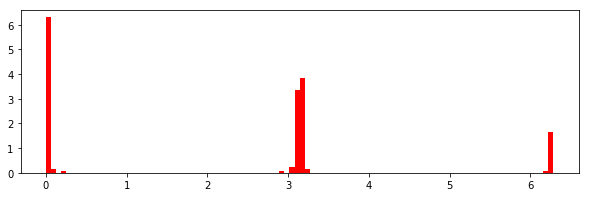

In [20]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
#ax.hist(init, bins = 150, alpha = 0.5)
ax.hist(dta, bins = 100, density = True, color = 'red')
#ax.plot(ejex1,ejey1, linewidth=4, alpha = 0.5)
#ax.plot(ejex2,ejey2, linewidth=4, alpha = 0.5)
plt.show()

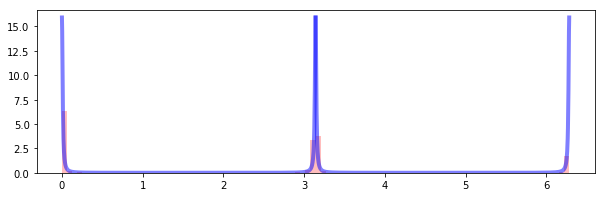

In [21]:
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
#ax.hist(init, bins = 150, alpha = 0.5)
ax.hist(dta, bins = 100, alpha = 0.26, density = True, color = 'red')
ax.plot(ejex1,ejey1, linewidth=4, alpha = 0.5, color = 'blue') 
ax.plot(ejex2,ejey2, linewidth=4, alpha = 0.5, color = 'blue') 
plt.show()